In [18]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
from ydata_profiling import ProfileReport  

df = pd.read_csv("Tunisair_flights_dataset.csv")  

print(df.head()) 

  Filght_date Flight_ID Departure point Arrival point  \
0  2016-01-03  TU 0712              CMN           TUN   
1  2016-01-13  TU 0757              MXP           TUN   
2  2016-01-16  TU 0214              TUN           IST   
3  2016-01-17  TU 0480              DJE           NTE   
4  2016-01-17  TU 0338              TUN           ALG   

  Scheduled_departure_time Scheduled_arrival_time STATUS Aircraft_code  \
0      2016-01-03 10:30:00    2016-01-03 12.55.00    ATA     TU 32AIMN   
1      2016-01-13 15:05:00    2016-01-13 16.55.00    ATA     TU 31BIMO   
2      2016-01-16 04:10:00    2016-01-16 06.45.00    ATA     TU 32AIMN   
3      2016-01-17 14:10:00    2016-01-17 17.00.00    ATA     TU 736IOK   
4      2016-01-17 14:30:00    2016-01-17 15.50.00    ATA     TU 320IMU   

   Arrival delay  
0          260.0  
1           20.0  
2            0.0  
3            0.0  
4           22.0  


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Filght_date               107833 non-null  object 
 1   Flight_ID                 107833 non-null  object 
 2   Departure point           107833 non-null  object 
 3   Arrival point             107833 non-null  object 
 4   Scheduled_departure_time  107833 non-null  object 
 5   Scheduled_arrival_time    107833 non-null  object 
 6   STATUS                    107833 non-null  object 
 7   Aircraft_code             107833 non-null  object 
 8   Arrival delay             107833 non-null  float64
dtypes: float64(1), object(8)
memory usage: 7.4+ MB
None


In [20]:
print(df.isnull().sum())

Filght_date                 0
Flight_ID                   0
Departure point             0
Arrival point               0
Scheduled_departure_time    0
Scheduled_arrival_time      0
STATUS                      0
Aircraft_code               0
Arrival delay               0
dtype: int64


In [21]:
print(df.describe())

       Arrival delay
count  107833.000000
mean       48.733013
std       117.135562
min         0.000000
25%         0.000000
50%        14.000000
75%        43.000000
max      3451.000000


In [22]:
profile = ProfileReport(df, explorative=True)  
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

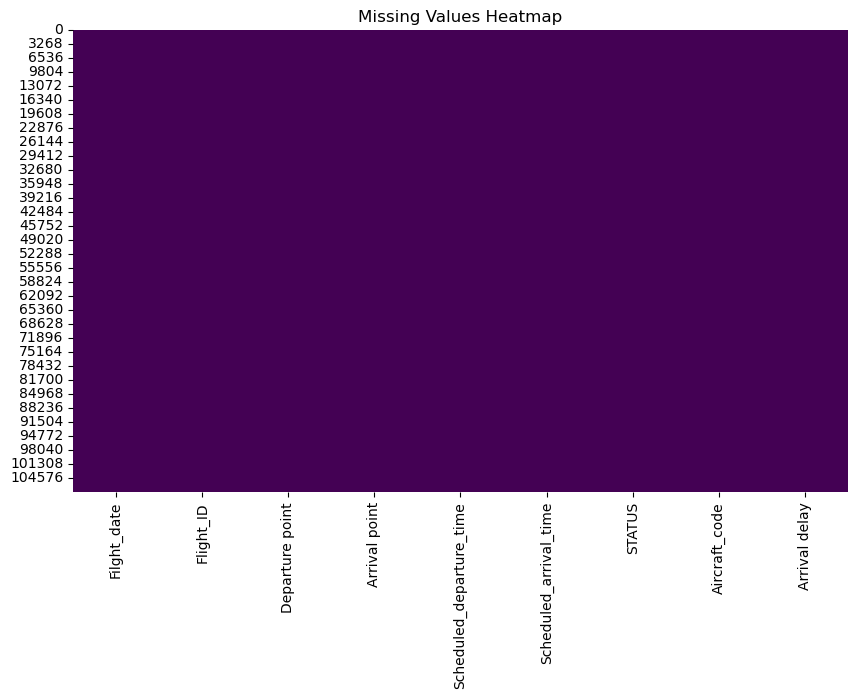

In [23]:
plt.figure(figsize=(10, 6))  
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)  
plt.title("Missing Values Heatmap") 
%matplotlib inline 
plt.show()

In [24]:
plt.figure(figsize=(10, 6))  
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  
plt.title("Correlation Matrix")
plt.show()  


ValueError: could not convert string to float: '2016-01-03'

In [ ]:
#ValueError: could not convert string to float: '2016-01-03'
print(df.dtypes)  

Filght_date                  object
Flight_ID                    object
Departure point              object
Arrival point                object
Scheduled_departure_time     object
Scheduled_arrival_time       object
STATUS                       object
Aircraft_code                object
Arrival delay               float64
dtype: object


In [ ]:
if 'Filght_date' in df.columns:
    df['Filght_date'] = pd.to_datetime(df['Filght_date'], errors='coerce')

In [ ]:
# Since correlation calculations work **only** on numerical values, we remove non-numeric columns.
df_numeric = df.select_dtypes(include=['number']) 
# Now, `df_numeric` contains only data that can be used for correlation analysis.
print(df_numeric.isnull().sum())
df_numeric = df_numeric.dropna()

Arrival delay    0
dtype: int64


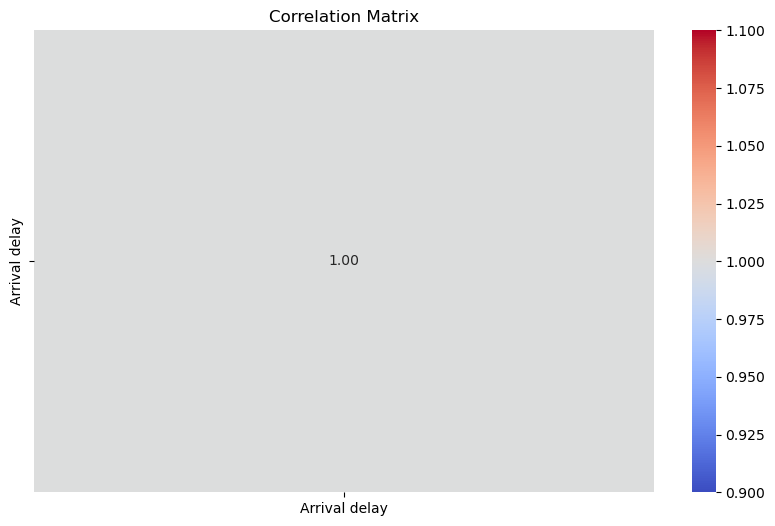

In [ ]:
plt.figure(figsize=(10, 6))  
sns.heatmap(df_numeric.corr(),  
            annot=True,  
            cmap="coolwarm",  
            fmt=".2f")  
plt.title("Correlation Matrix")  
plt.show()  
